In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LF solver

In [120]:
# load LF data
rho = np.loadtxt('./data/lf/rho_bell_mag_075.csv',delimiter=',')
rho = rho[:,:-1]

u = np.loadtxt('./data/lf/u_bell_mag_075.csv',delimiter=',')
print(rho.shape, u.shape)


#rho = rho[::10, ::10]
#u = u[::10,::10]
N, T = rho.shape

(240, 960) (240, 960)


In [121]:
rho.shape

(240, 960)

In [122]:
rho = rho[:, ::10]


In [123]:
# LF solver
U_MAX = 1
RHO_MAX = 1

dt = 3/96
dx = 1/240


def u(x):
    return U_MAX*(1-x/RHO_MAX)

def q(x):
    return x*u(x)

def lf_at(x):
    x_l = np.zeros(x.shape)
    x_l[0] = x[-1]
    x_l[1:] = x[:-1]
    
    x_r = np.zeros(x.shape)
    x_r[-1] = x[0]
    x_r[:-1] = x[1:]
    
    #print('x:',x)
    #print('x_l', x_l)
    #print('x_r', x_r)
    
    q_l = np.array(list(map(q, x_l)))
    q_r = np.array(list(map(q, x_r)))
    
    q_pred = (x_l+x_r)/2 - (dt/2/dx) * (q_r - q_l)
    return q_pred

In [124]:
rho_pred = np.zeros((rho.shape[0], 96))
rho_pred[:,0] = rho[:,0]

for i in range(1, 96):
    rho_pred[:,i] = lf_at(rho_pred[:,i-1])

/home/zm2303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/home/zm2303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract
/home/zm2303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
/home/zm2303/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in add


In [100]:
rho_pred = rho_pred[:, ::10]

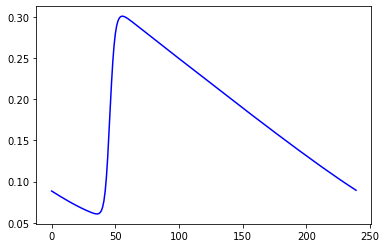

In [116]:
i = 51
plt.plot(rho[:,i], 'b')
plt.plot(rho_pred[:,i], '--r')

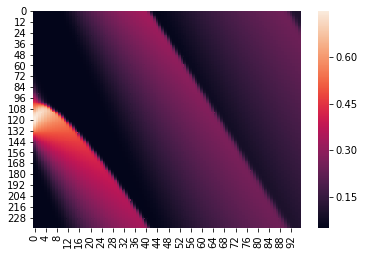

In [117]:
import seaborn as sbs
sbs.heatmap(rho)

/home/zm2303/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:524: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


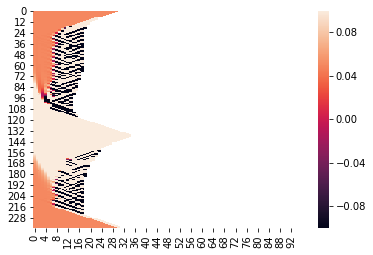

In [125]:
sbs.heatmap(rho_pred)

# Godnuov solver